In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [4]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [17]:
def outlier(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return lower_bound, upper_bound
lower,upper=outlier(df)

In [18]:
df_capped=df.clip(lower,upper,axis=1)
df_capped = outlier(df)
df_capped

(LB          105.000000
 AC           -0.008475
 FM           -0.003850
 UC           -0.005177
 DL           -0.004934
 DS            0.000000
 DP            0.000000
 ASTV        -11.500000
 MSTV         -0.800000
 ALTV        -16.500000
 MLTV         -4.850000
 Width       -57.500000
 Tendency     -1.500000
 NSP           1.000000
 dtype: float64,
 LB          161.000000
 AC            0.014124
 FM            0.006416
 UC            0.013564
 DL            0.008224
 DS            0.000000
 DP            0.000000
 ASTV        104.500000
 MSTV          3.200000
 ALTV         27.500000
 MLTV         20.350000
 Width       194.500000
 Tendency      2.500000
 NSP           1.000000
 dtype: float64)

In [21]:
df_clipped = df.clip(lower,upper,axis=1)
df_clipped

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006416,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.20,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.10,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.10,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.00,66.0,1.000000,1.0


In [23]:
stat_summary = df_clipped.describe()
print(stat_summary)

                LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.293227     0.003148     0.001568     0.004362     0.001770   
std       9.979659     0.003850     0.002485     0.003001     0.002668   
min     105.000000    -0.008475    -0.003850    -0.005177    -0.004934   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     161.000000     0.014124     0.006416     0.013564     0.008224   

           DS      DP         ASTV         MSTV         ALTV         MLTV  \
count  2105.0  2105.0  2126.000000  2126.000000  2126.000000  2105.000000   
mean      0.0     0.0    46.981873     1.304644     6.691678     8.022202   
std       0.0     0.0    17.612745     0.781091    10.378400     5.094420   
min       0.0     0.0   -

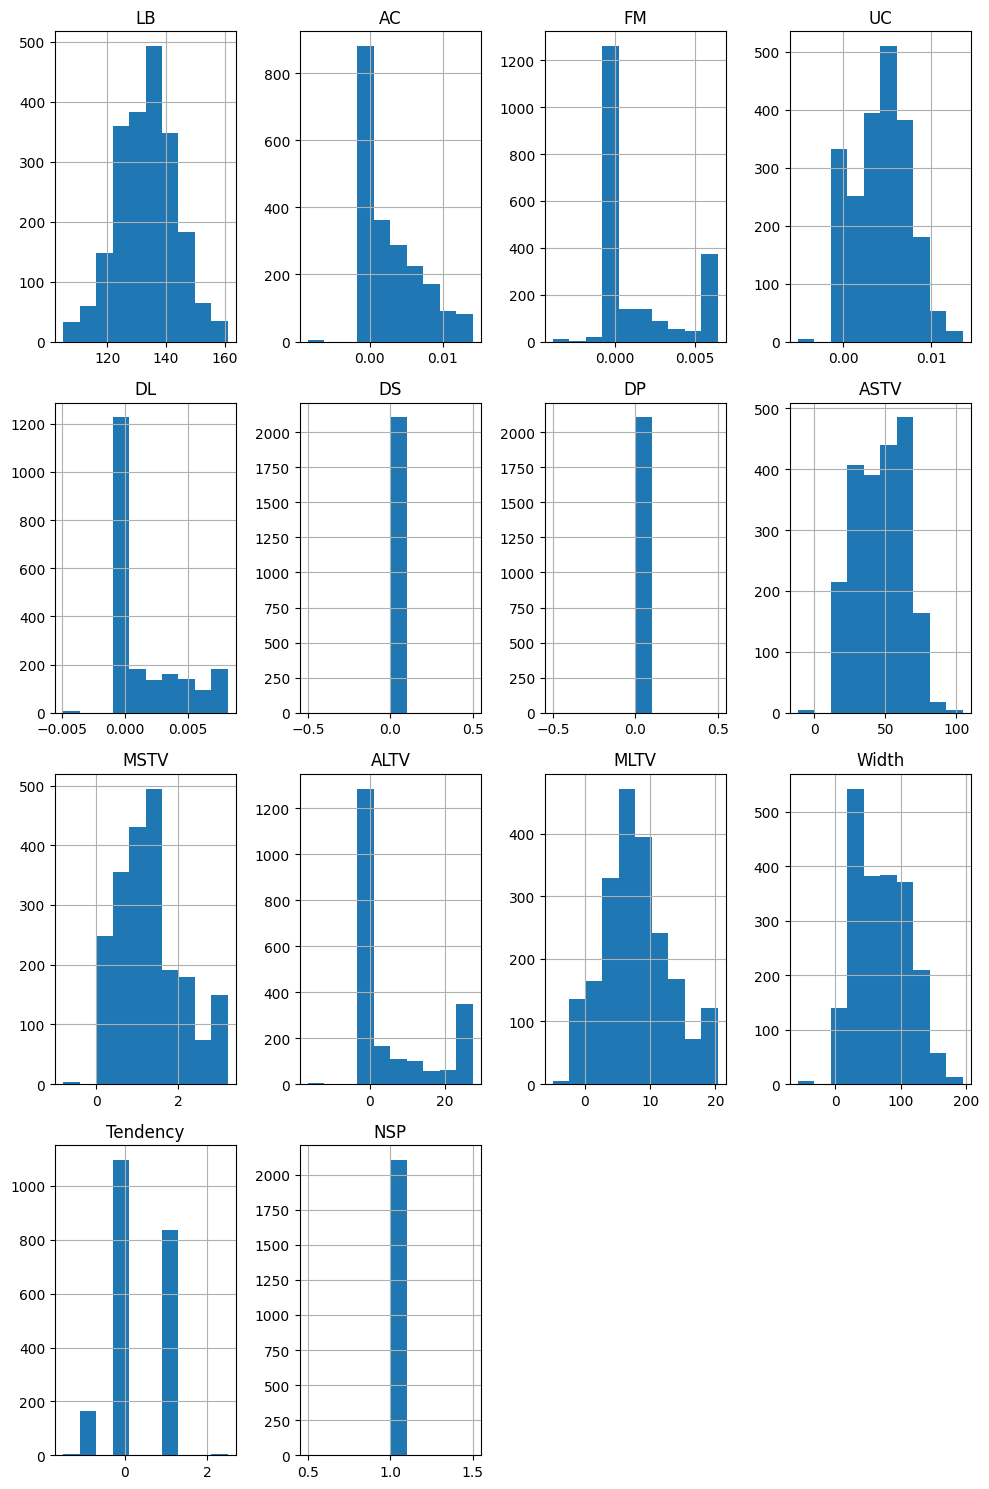

In [26]:
import matplotlib.pyplot as plt
df_clipped.hist(figsize=(10,15))
plt.tight_layout()
plt.show()

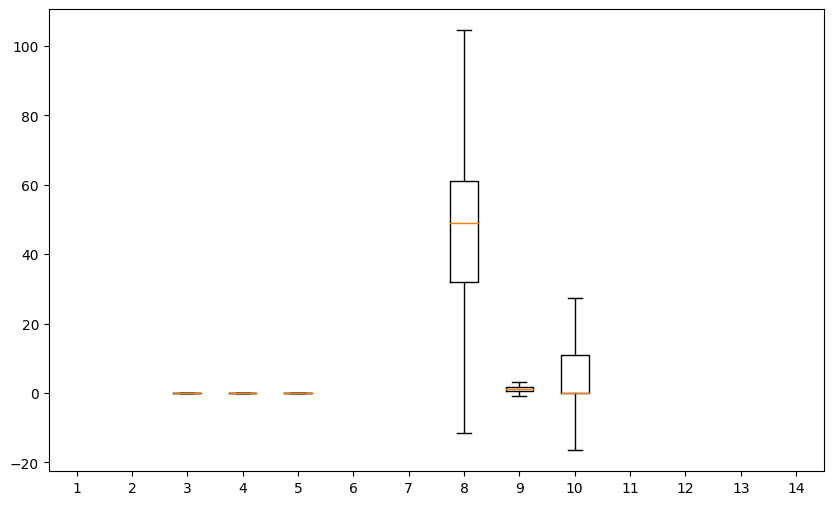

In [27]:
plt.figure(figsize=(10,6))
plt.boxplot(df_clipped)
plt.show()

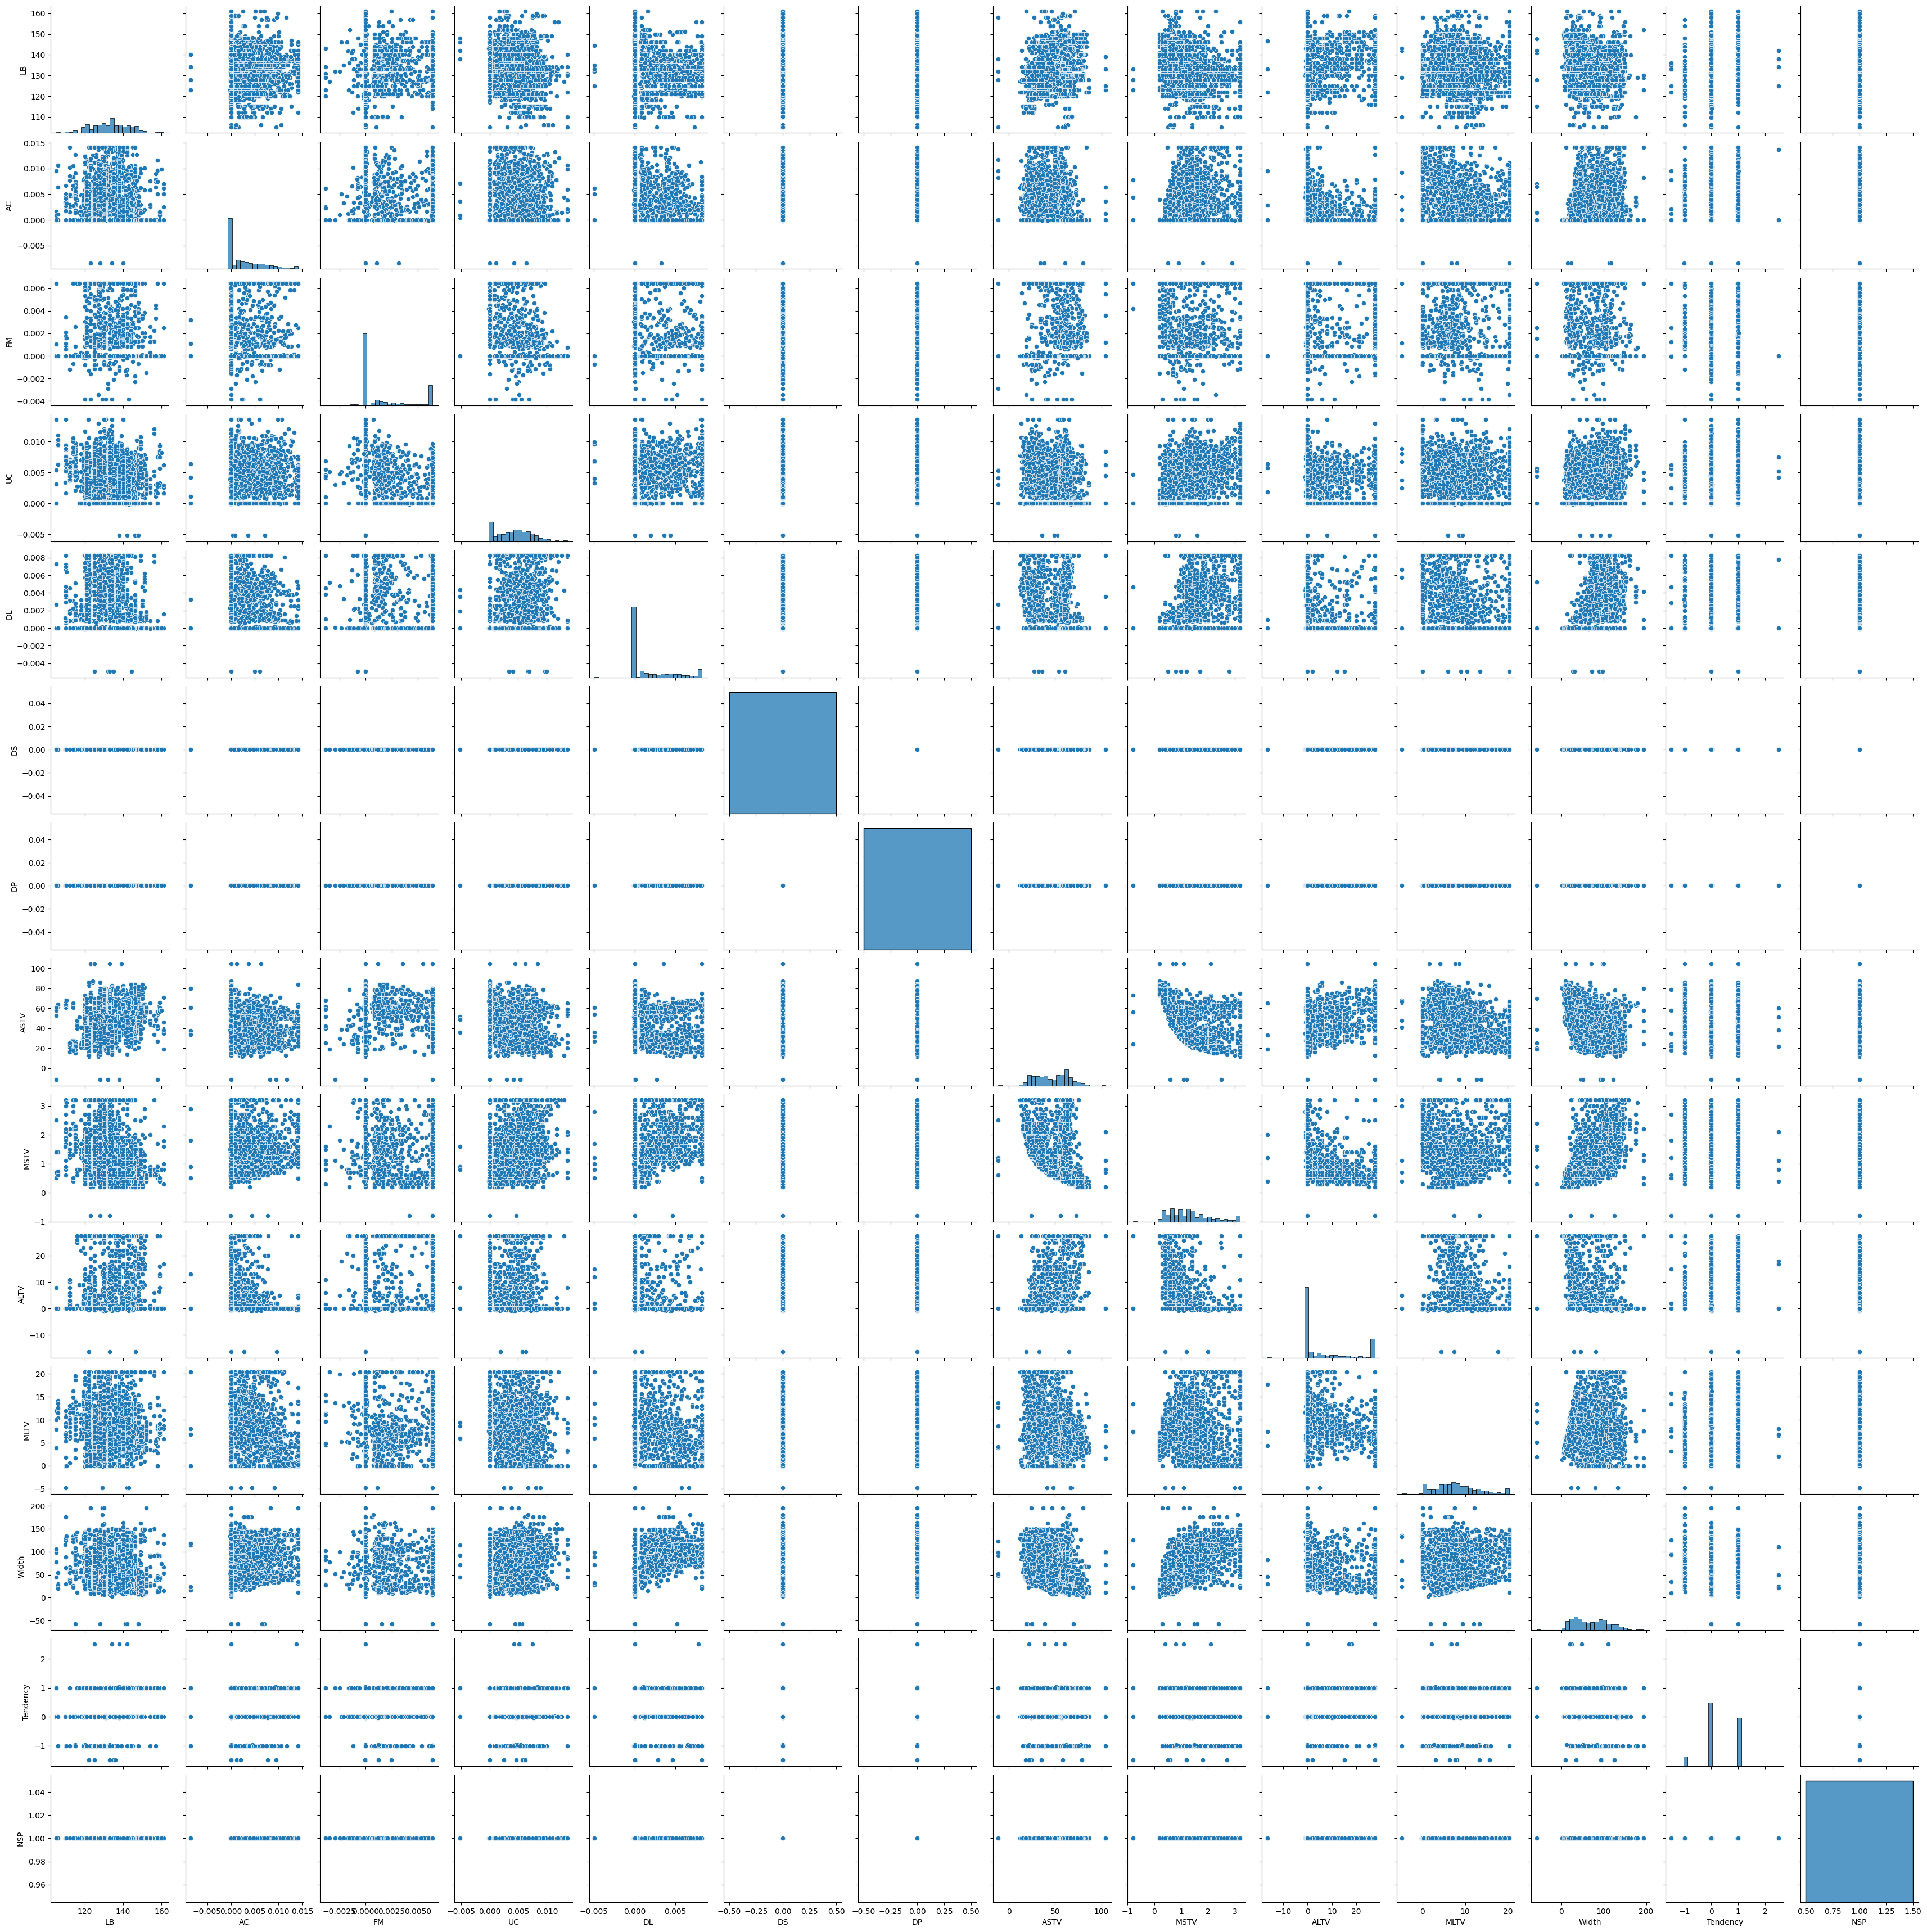

In [29]:
import seaborn as sns
sns.pairplot(df_clipped)
plt.show()

In [32]:
strong_corelation = df_clipped.corr()
print(strong_corelation)

                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.080905 -0.006949 -0.163228 -0.156803 NaN NaN  0.286659   
AC       -0.080905  1.000000  0.076674  0.093890 -0.103165 NaN NaN -0.273174   
FM       -0.006949  0.076674  1.000000 -0.317265 -0.017610 NaN NaN  0.156351   
UC       -0.163228  0.093890 -0.317265  1.000000  0.268605 NaN NaN -0.215984   
DL       -0.156803 -0.103165 -0.017610  0.268605  1.000000 NaN NaN -0.111624   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.286659 -0.273174  0.156351 -0.215984 -0.111624 NaN NaN  1.000000   
MSTV     -0.297509  0.218617  0.070300  0.297843  0.566340 NaN NaN -0.433844   
ALTV      0.323341 -0.410423 -0.013420 -0.293340 -0.295886 NaN NaN  0.439040   
MLTV     -0.041988 -0.152315 -0.036966 -0.073803 -0.242513 NaN NaN -0.325637   
Width    -0.140044  0.284203  0.165622  